
Bryan Chi Fai Pang

Student ID: 501210081

TMU: The Chang School of Continuing Education

CIND 820 Big Data Analytics Project

Dr Ceni BABAOGLU

10 November 2023

#### Github Repository


https://github.com/bryantoca/capstone_project

Please note this notebook takse around 15 mintues to run / render.
An html version as well as NBViewer version are available on line.


# Initial Results and Code

## Part 1: Creation of Train, Validation, and Test Sets

1. **Train-Validate-Final Test Split:**

    - 80% train-validate split, 20% test set.
    - Anomaly records removed from train-validate sets.





2. **Handling Abnormal Records:**

    - Records with zero credit taken and grades throughout university but labeled as 'Graduate' moved.



3. **Target Mapping:**

    - Strings converted to numeric using the following mapping:
        {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


## Part 2: Model Selection Using 10-fold Cross Validation

Using the following models:
- Logistic Regression
- Random Forest (n_estimators=10 and n_estimators=100)
- Support Vector Machine (SVM)
- SVM with a linear kernel
- Gradient Boosting
- XGB Classifier

Performance Metrics:
- Average Accuracy
- Average F1 Score
- Standard Deviation (SD)

## Part 3: Research Question Analysis

Subsets of the dataset are trained and tested using Random Forest and XGB Classifier with 80-20 train-validate split.

Subsets:
1. S1: Academic, Macroeconomic
2. S2: Academic, Macroeconomics, Demographic
3. S3: Academic, Macroeconomics, Socioeconomic
4. S4: Academic, Macroeconomic, Demographic, Socioeconomic
5. S5: Demographic, Socioeconomic

Full Classification Reports are displayed for each subset.


## Part 1: Creation of Train, Validation, and Test Sets

In [10]:
# import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier  
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from statistics import mean, stdev
from datetime import datetime
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance











In [11]:
# Using the datetime.now() at the beginning and at the end to check time 
# needed to run the codes.

# datetime object containing current date and time
Start = datetime.now()
 
print("Notebook started at ", Start )



Notebook started at  2023-11-10 19:14:34.151845


1. **Train-Validate-Final Test Split:**
    - 80% train-validate split, 20% test set (this test set is not use but for final test /results)
    

In [12]:
# creating train_valide and test_set 
# test_set is for final testing

df = pd.read_csv("data.csv",sep=";") 

#data = pd.read_csv("data_cat.csv", sep=";")

train_validate_set, test_set = train_test_split(df, test_size = 0.2, random_state=76)

- Anomaly Detection : records removed from train-validate sets.
These records are students that are classified as "Graduate", but with zero for all curricular units taken as well as zero as grades. 


In [13]:

anomalies = train_validate_set[(train_validate_set['Target'] == 'Graduate') & (train_validate_set.iloc[:, 21:33].eq(0).all(axis=1))]
anomalies_to_print = anomalies[["Target"]+list(train_validate_set.columns[21:33])]
anomalies_to_print.head()



,Target,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
1889,Graduate,0,0,0,0,0.0,0,0,0,0,0,0.0,0
3135,Graduate,0,0,0,0,0.0,0,0,0,0,0,0.0,0
881,Graduate,0,0,0,0,0.0,0,0,0,0,0,0.0,0
789,Graduate,0,0,0,0,0.0,0,0,0,0,0,0.0,0
1512,Graduate,0,0,0,0,0.0,0,0,0,0,0,0.0,0


In [14]:
anomal = train_validate_set[(train_validate_set['Target'] == 'Graduate') & (train_validate_set.iloc[:, 21:33].eq(0).all(axis=1))]
anomal.index

Int64Index([1889, 3135,  881,  789, 1512,  527, 2194, 1192, 2920, 2637, 3405,
             557, 2387, 2026, 2008,  574, 2899, 3447,  101,  405, 3023, 4353,
            2356, 3160, 1350,  821, 3024,  869, 2371, 3707, 1751,  679, 4291,
            1658, 2508,  534, 1585, 2230, 1507, 3928, 2955, 3683, 2406, 1425,
              20, 2814, 1883, 4365, 2793, 2656, 3732, 3481,  728, 2124, 1890,
            1363, 3717,   66, 3317, 2328],
           dtype='int64')

In [15]:
train_validate_set.drop(anomal.index,inplace=True)

3. **Target Mapping:**
    - Strings converted to numeric using the following mapping:
        {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

In [16]:

target_value_counts = train_validate_set['Target'].value_counts()

print(target_value_counts)

Graduate    1704
Dropout     1155
Enrolled     620
Name: Target, dtype: int64


In [17]:
# Create a mapping dicctionary for Target, as XGBoost take only numeric value.
mapping = {'Dropout':0, 'Enrolled':1, 'Graduate':2}

train_validate_set['Target']=train_validate_set['Target'].map(mapping)


train_validate_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479 entries, 2931 to 2721
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3479 non-null   int64  
 1   Application mode                                3479 non-null   int64  
 2   Application order                               3479 non-null   int64  
 3   Course                                          3479 non-null   int64  
 4   Daytime evening attendance                      3479 non-null   int64  
 5   Previous qualification                          3479 non-null   int64  
 6   Previous qualification (grade)                  3479 non-null   float64
 7   Nacionality                                     3479 non-null   int64  
 8   Mother's qualification                          3479 non-null   int64  
 9   Father's qualification                

## Part 2: Model Selection Using 10-fold Cross Validation

Using the following models:

- Random Forest (n_estimators=10 and n_estimators=100)
- Support Vector Machine (SVM)
- SVM with a linear kernel
- Gradient Boosting
- XGB Classifier

Performance Metrics:
- Average Accuracy
- Average F1 Score
- Standard Deviation (SD)

Using 10-fold cross validation to give an initial results to see how different algorithms.

First, for each algorithm, F1 and Accuracy  is reported of each fold and then average F1 and Accuracy, as well as SD are reported. 

In [18]:


# Train_valide_set is DataFrame



# Separate features and target
X = train_validate_set.drop('Target', axis=1)
y = train_validate_set['Target']

# Define models
models = {
    
    "Random Forest n_estimators=10 ": RandomForestClassifier(n_estimators=10, random_state=76),
    "Random Forest n_estimators=100 ": RandomForestClassifier(n_estimators=100, random_state=76),
    "Support Vector Machine": SVC(random_state=76),
    "SVM kernel linear":SVC(kernel='linear',random_state=76),
    "Gradient Boosting": GradientBoostingClassifier(random_state=76),
    "XGB Classifier " : XGBClassifier(objective='multi:softmax', num_class=3, random_state=76)

}

print("Here are the results of the 6 models with 10-fold cross-validation.")
print()

# Perform 10-fold cross-validation for each model
results = {}
for model_name, model in models.items():
    kfold = KFold(n_splits=10, shuffle=True, random_state=76)
    f1_scores = cross_val_score(model, X, y, cv=kfold, scoring='f1_macro')
    acc_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

    results[model_name] = {
        'F1_scores': f1_scores,
        'Acc_scores': acc_scores,
        'Average_F1': mean(f1_scores),
        'Average_Acc': mean(acc_scores),
        'F1_Std_Dev': stdev(f1_scores),
        'Acc_Std_Dev': stdev(acc_scores)
    }

# Display detailed results
for model, scores in results.items():
    print(f"Model: {model}")
    for i, (f1, acc) in enumerate(zip(scores['F1_scores'], scores['Acc_scores']), 1):
        print(f"Fold {i}: F1 Score = {f1:.4f}, Accuracy = {acc:.4f}")
    print(f"Average F1: {scores['Average_F1']:.4f}, Average Accuracy: {scores['Average_Acc']:.4f}")
    print(f"F1 Standard Deviation: {scores['F1_Std_Dev']:.4f}, Accuracy Standard Deviation: {scores['Acc_Std_Dev']:.4f}")
    print("\n")

# Display summary
print("Summary:")
for model, scores in results.items():
    print(f"{model}: Average F1 = {scores['Average_F1']:.4f}, Average Accuracy = {scores['Average_Acc']:.4f}, F1 SD = {scores['F1_Std_Dev']:.4f}, Accuracy SD = {scores['Acc_Std_Dev']:.4f}")


Here are the results of the 6 models with 10-fold cross-validation.

Model: Random Forest n_estimators=10 
Fold 1: F1 Score = 0.6415, Accuracy = 0.7500
Fold 2: F1 Score = 0.6388, Accuracy = 0.7328
Fold 3: F1 Score = 0.6442, Accuracy = 0.7385
Fold 4: F1 Score = 0.6417, Accuracy = 0.7557
Fold 5: F1 Score = 0.6717, Accuracy = 0.7644
Fold 6: F1 Score = 0.6407, Accuracy = 0.7299
Fold 7: F1 Score = 0.6553, Accuracy = 0.7557
Fold 8: F1 Score = 0.6506, Accuracy = 0.7471
Fold 9: F1 Score = 0.6346, Accuracy = 0.7213
Fold 10: F1 Score = 0.6998, Accuracy = 0.7781
Average F1: 0.6519, Average Accuracy: 0.7474
F1 Standard Deviation: 0.0199, Accuracy Standard Deviation: 0.0172


Model: Random Forest n_estimators=100 
Fold 1: F1 Score = 0.6881, Accuracy = 0.7845
Fold 2: F1 Score = 0.6577, Accuracy = 0.7471
Fold 3: F1 Score = 0.6768, Accuracy = 0.7816
Fold 4: F1 Score = 0.7294, Accuracy = 0.8075
Fold 5: F1 Score = 0.6765, Accuracy = 0.7845
Fold 6: F1 Score = 0.6662, Accuracy = 0.7529
Fold 7: F1 Score = 

Summary of these models 

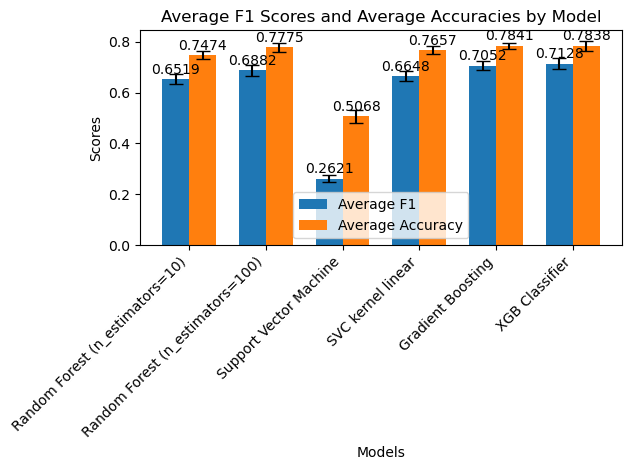

In [19]:


# Summary of the data

# Data
models = [
    "Random Forest (n_estimators=10)",
    "Random Forest (n_estimators=100)",
    "Support Vector Machine",
    "SVC kernel linear",
    "Gradient Boosting",
    "XGB Classifier"
]

avg_f1_scores = [0.6519, 0.6882, 0.2621, 0.6648, 0.7052, 0.7128]
avg_accuracies = [0.7474, 0.7775, 0.5068, 0.7657, 0.7841, 0.7838]
f1_std = [0.0199, 0.0211, 0.0133, 0.0192, 0.0176, 0.0220]
accuracy_std = [0.0172, 0.0170, 0.0264, 0.0155, 0.0109, 0.0206]

# Plotting
x = range(len(models))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x, avg_f1_scores, width, label='Average F1', yerr=f1_std, capsize=5)
bar2 = ax.bar([i + width for i in x], avg_accuracies, width, label='Average Accuracy', yerr=accuracy_std, capsize=5)

# Adding actual values on top of the bars
for bar, values in zip([bar1, bar2], [avg_f1_scores, avg_accuracies]):
    for i, value in enumerate(values):
        ax.text(bar[i].get_x() + bar[i].get_width() / 2, bar[i].get_height() + 0.01,
                f'{value:.4f}', ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Average F1 Scores and Average Accuracies by Model')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


#### Results

Of the 6 models trained, Random Forest (n_estimator=100), Gradient Boosting and XGB Classifer have the highest accuracy and F1 score.

Based on these results, the project will focus of these three models and continue with  feature selection / feature engineering as well 
model hyperparametr tuning.



## Part 3: Research Question Analysis

Research question:

Dose inclusion of Demographic and Socioeconmoic data improve dropout prediction, and by how much ?
To annsewer the question, subsets of datasets are created and for initial results, Random Forest and XGB Classifier are used.

For each subset, Classification Report, Feature Importance and Permutation Importance are showned.

Subsets of the dataset are trained and tested using Random Forest and XGB Classifier with 80-20 train-validate split.

Subsets:
1. S1: Academic, Macroeconomic
2. S2: Academic, Macroeconomics, Demographic
3. S3: Academic, Macroeconomics, Socioeconomic
4. S4: Academic, Macroeconomic, Demographic, Socioeconomic
5. S5: Demographic, Socioeconomic

Full Classification Reports are displayed for each subset.

Creating the subsets

In [20]:
demographic_columns = ['Marital status','Nacionality','Displaced','Gender','Age at enrollment','International']
socioeconomic_columns =["Mother's qualification","Father's qualification","Mother's occupation","Father's occupation",'Educational special needs','Debtor',
 'Tuition fees up to date','Scholarship holder']
macroeconomic_columns = ['Unemployment rate','Inflation rate','GDP']
academic_columns = [
 'Application mode',
 'Application order',
 'Course',
 'Daytime evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)'
 ]
target_s = ['Target']

In [21]:
s1 = train_validate_set[target_s + macroeconomic_columns + academic_columns]
s2 = train_validate_set[target_s + macroeconomic_columns + academic_columns + demographic_columns]
s3 = train_validate_set[target_s + macroeconomic_columns + academic_columns + socioeconomic_columns]
s4 = train_validate_set[target_s + macroeconomic_columns + academic_columns + socioeconomic_columns + demographic_columns]
s5 = train_validate_set[target_s + demographic_columns + socioeconomic_columns ]

The 5 datasets with Random Forest

Results for s1:
Attribute Groups: Academic, Macroeconomic
Accuracy: 0.7586
              precision    recall  f1-score   support

     Dropout       0.77      0.76      0.77       226
    Enrolled       0.52      0.27      0.36       128
    Graduate       0.79      0.94      0.86       342

    accuracy                           0.76       696
   macro avg       0.70      0.66      0.66       696
weighted avg       0.74      0.76      0.74       696



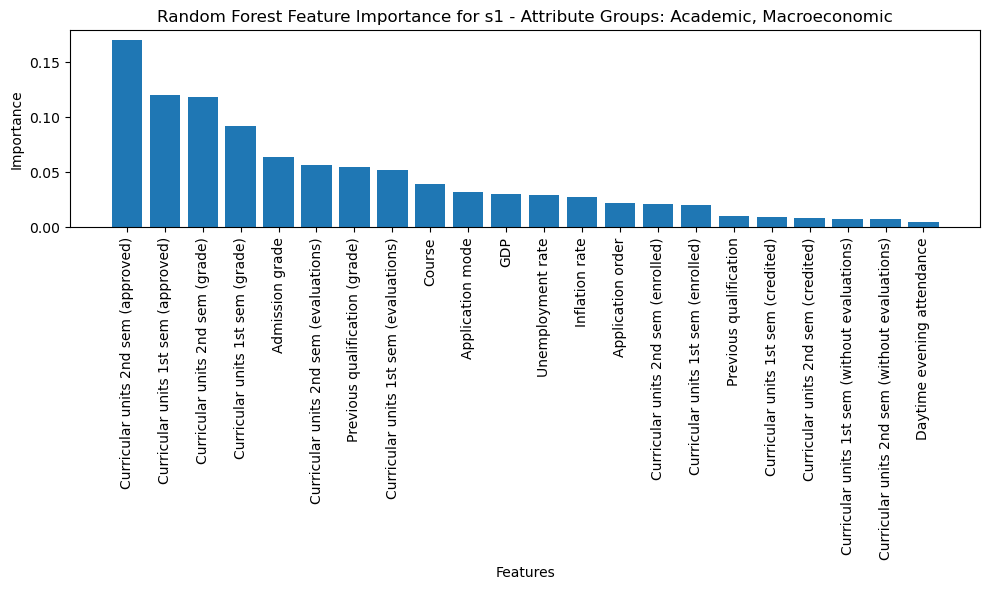

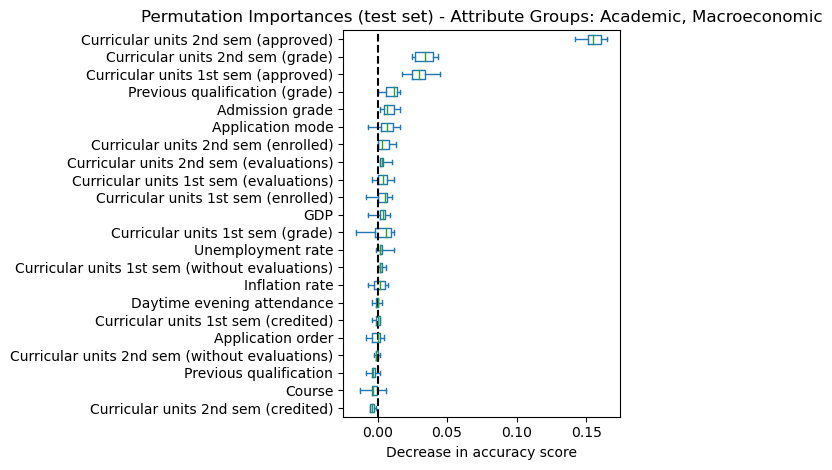

-------------------------------------------------------------

Results for s2:
Attribute Groups: Academic, Macroeconomics, Demographic
Accuracy: 0.7629
              precision    recall  f1-score   support

     Dropout       0.76      0.76      0.76       226
    Enrolled       0.55      0.27      0.36       128
    Graduate       0.80      0.95      0.87       342

    accuracy                           0.76       696
   macro avg       0.70      0.66      0.66       696
weighted avg       0.74      0.76      0.74       696



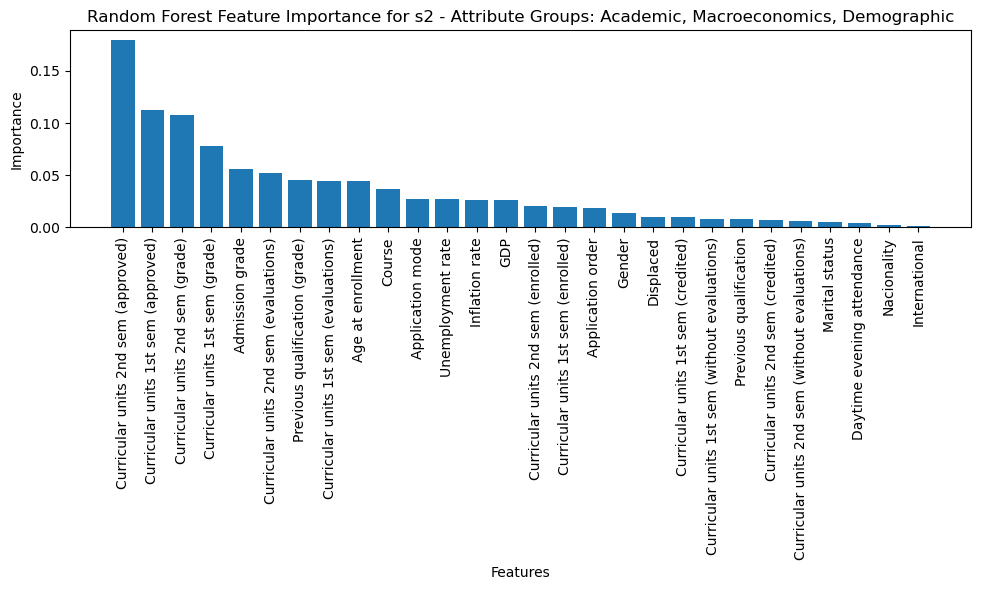

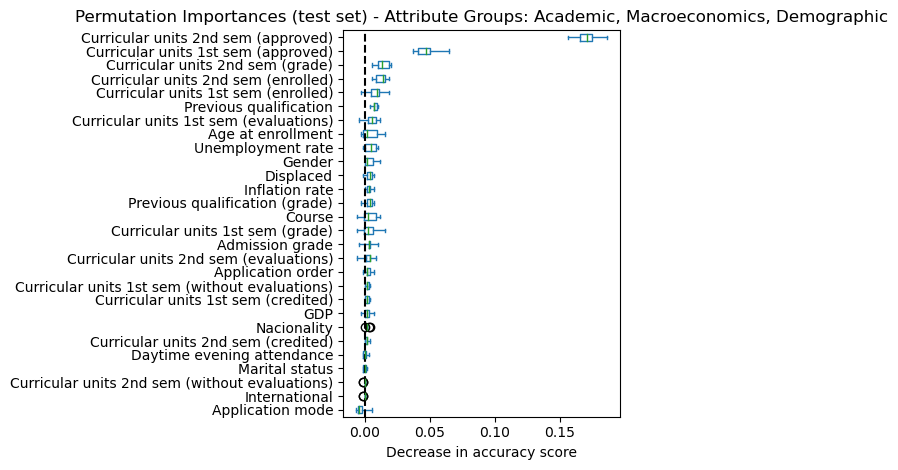

-------------------------------------------------------------

Results for s3:
Attribute Groups: Academic, Macroeconomics, Socioeconomic
Accuracy: 0.7672
              precision    recall  f1-score   support

     Dropout       0.81      0.77      0.79       226
    Enrolled       0.49      0.27      0.35       128
    Graduate       0.79      0.95      0.86       342

    accuracy                           0.77       696
   macro avg       0.70      0.66      0.67       696
weighted avg       0.74      0.77      0.74       696



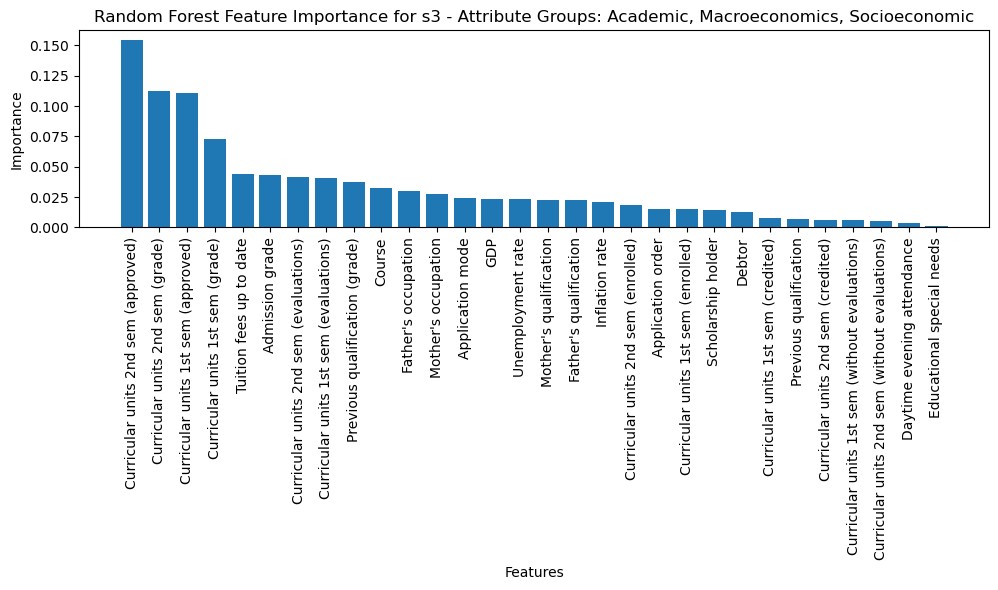

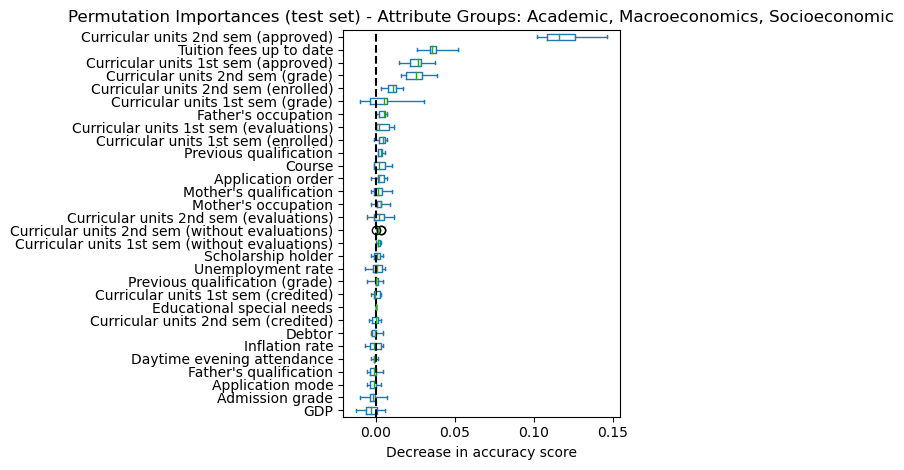

-------------------------------------------------------------

Results for s4:
Attribute Groups: Academic, Macroeconomic, Demographic, Socioeconomic
Accuracy: 0.7744
              precision    recall  f1-score   support

     Dropout       0.82      0.77      0.80       226
    Enrolled       0.55      0.32      0.41       128
    Graduate       0.79      0.95      0.86       342

    accuracy                           0.77       696
   macro avg       0.72      0.68      0.69       696
weighted avg       0.76      0.77      0.76       696



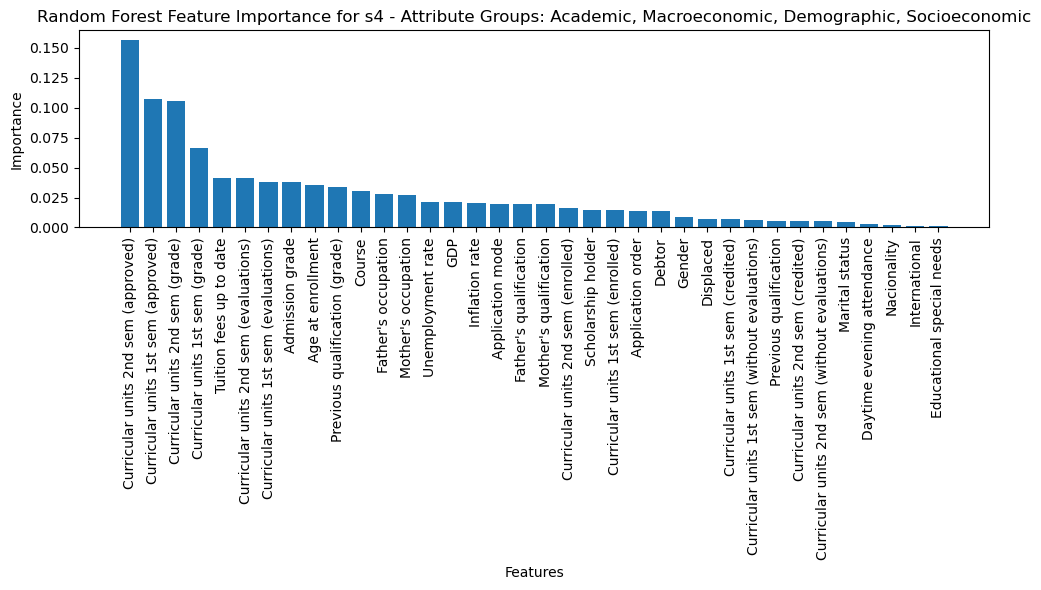

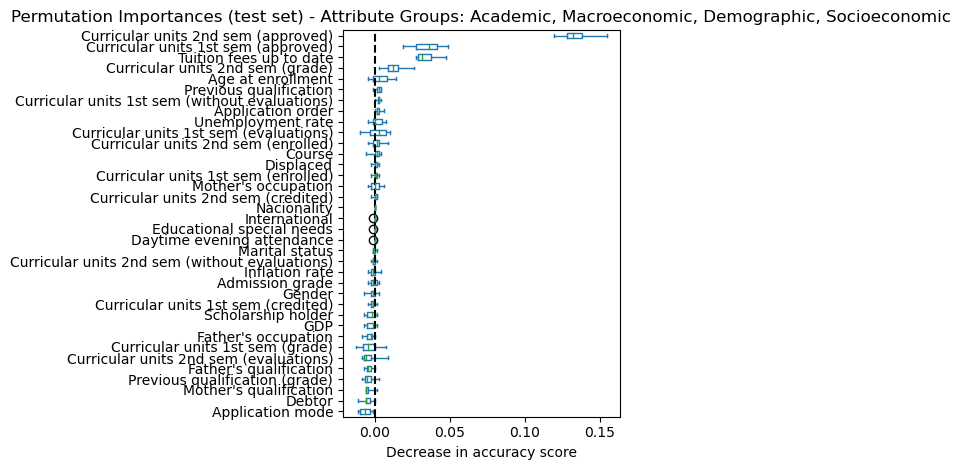

-------------------------------------------------------------

Results for s5:
Attribute Groups: Demographic, Socioeconomic
Accuracy: 0.5690
              precision    recall  f1-score   support

     Dropout       0.57      0.52      0.54       226
    Enrolled       0.24      0.11      0.15       128
    Graduate       0.61      0.77      0.68       342

    accuracy                           0.57       696
   macro avg       0.47      0.47      0.46       696
weighted avg       0.53      0.57      0.54       696



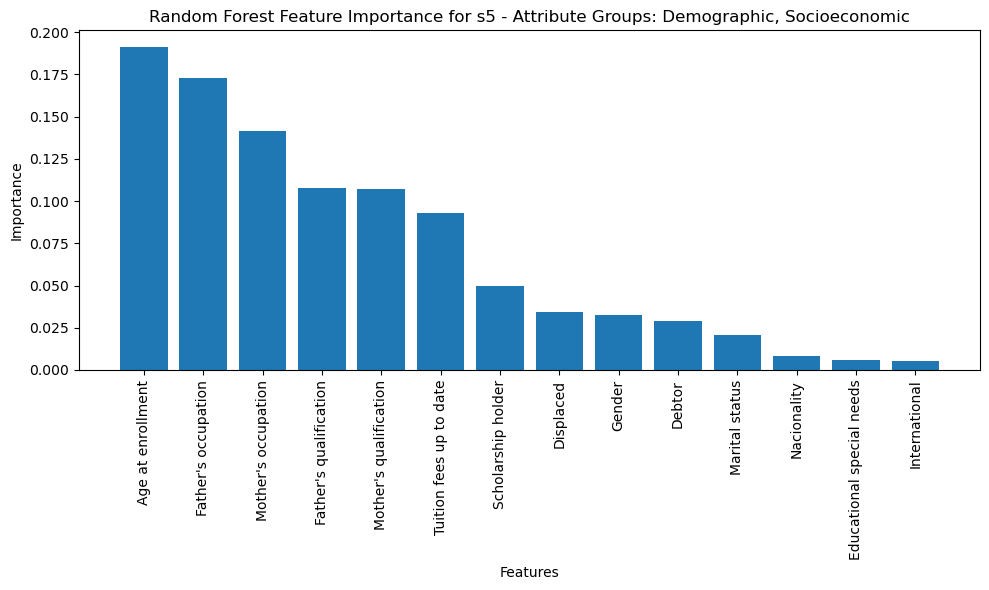

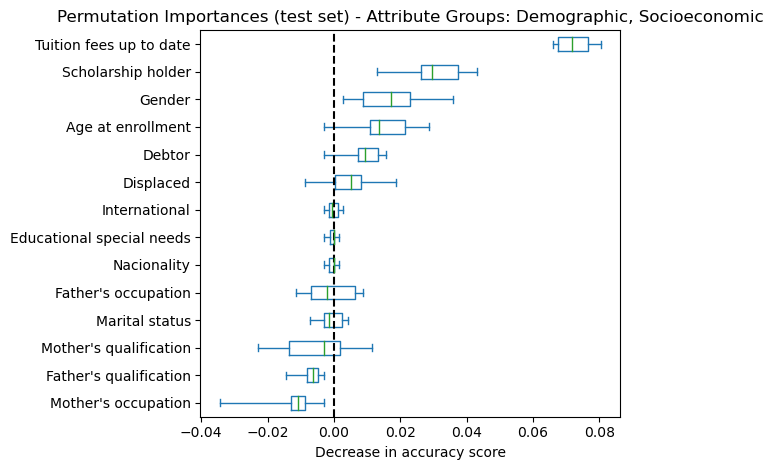

-------------------------------------------------------------



In [22]:


dataframes = [s1, s2, s3, s4, s5]  

attribute_groups = [
    ['Academic', 'Macroeconomic'],
    ['Academic', 'Macroeconomics', 'Demographic'],
    ['Academic', 'Macroeconomics', 'Socioeconomic'],
    ['Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['Demographic', 'Socioeconomic']
]


results = []
for i, df in enumerate(dataframes, 1):
    target = df["Target"]
    features = df.drop("Target", axis=1)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=76)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=76)
    rf_classifier.fit(X_train, y_train)
    predictions = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    target_names = ['Dropout', 'Enrolled', 'Graduate']
    report = classification_report(y_test, predictions, target_names=target_names)
    results.append((accuracy, report))

    print(f"Results for s{i}:")
    print(f"Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)

    feature_importance = rf_classifier.feature_importances_
    feature_names = list(X_train.columns)

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
    plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Random Forest Feature Importance for s{i} - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.tight_layout()
    plt.show()

    result = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(
        result.importances[sorted_importances_idx].T,
        columns=X_train.columns[sorted_importances_idx],
    )

    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances (test set) - Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()
    plt.show()
    

    print("-------------------------------------------------------------\n")


The 5 datasets with XGB Classifier



Results for s1:
Attribute Groups: Academic, Macroeconomic
Accuracy: 0.7385
              precision    recall  f1-score   support

     Dropout       0.75      0.72      0.73       226
    Enrolled       0.42      0.27      0.33       128
    Graduate       0.80      0.93      0.86       342

    accuracy                           0.74       696
   macro avg       0.66      0.64      0.64       696
weighted avg       0.71      0.74      0.72       696



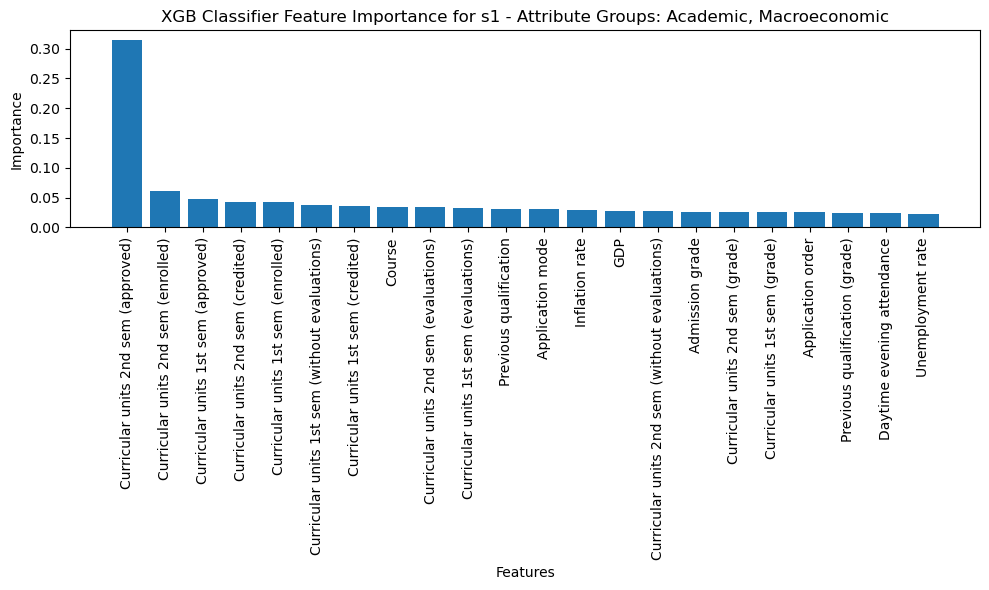

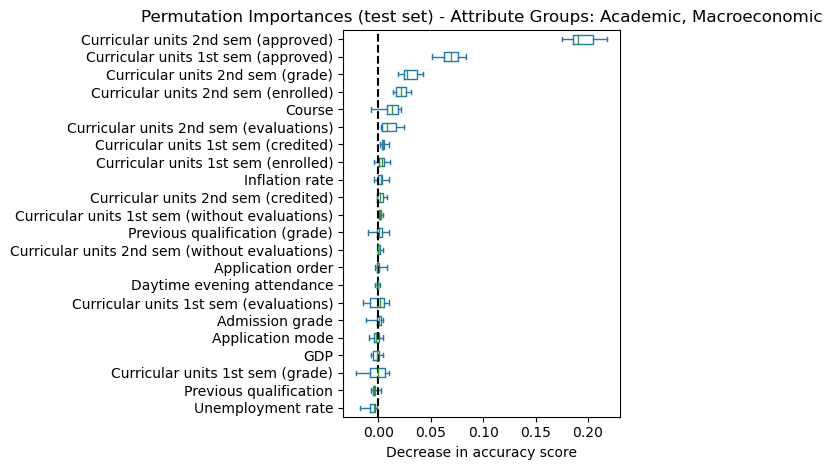

-------------------------------------------------------------

Results for s2:
Attribute Groups: Academic, Macroeconomics, Demographic
Accuracy: 0.7371
              precision    recall  f1-score   support

     Dropout       0.75      0.72      0.74       226
    Enrolled       0.42      0.26      0.32       128
    Graduate       0.79      0.93      0.85       342

    accuracy                           0.74       696
   macro avg       0.66      0.64      0.64       696
weighted avg       0.71      0.74      0.72       696



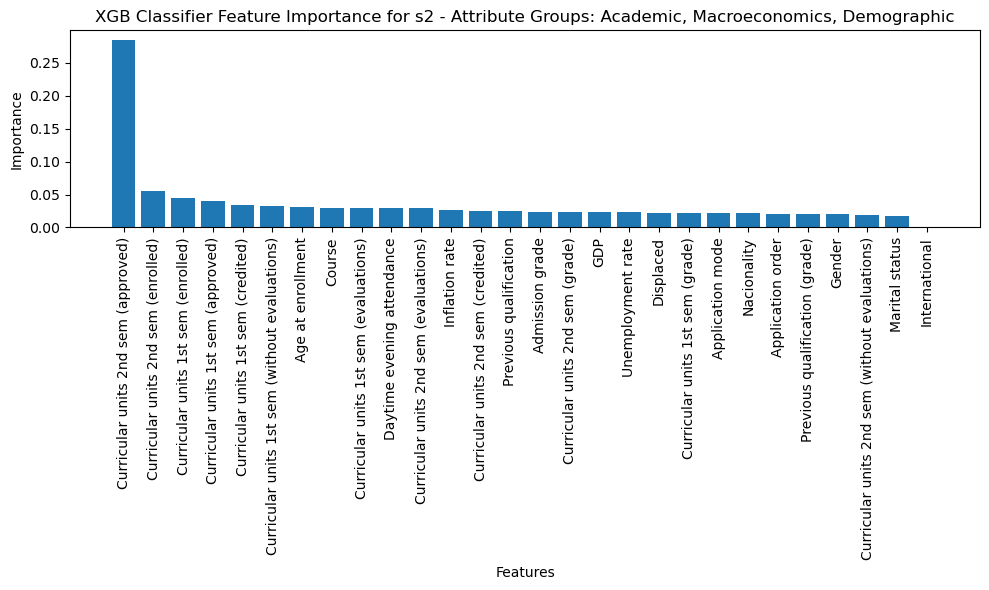

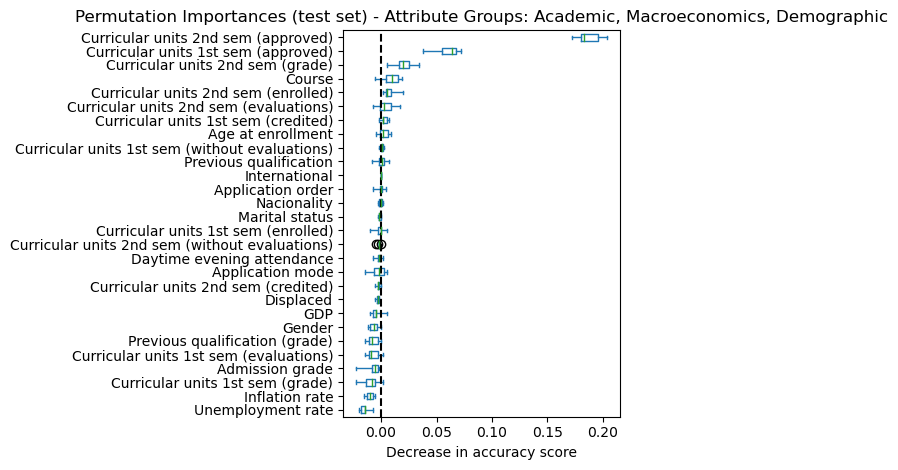

-------------------------------------------------------------

Results for s3:
Attribute Groups: Academic, Macroeconomics, Socioeconomic
Accuracy: 0.7888
              precision    recall  f1-score   support

     Dropout       0.82      0.78      0.80       226
    Enrolled       0.57      0.41      0.47       128
    Graduate       0.83      0.94      0.88       342

    accuracy                           0.79       696
   macro avg       0.74      0.71      0.72       696
weighted avg       0.78      0.79      0.78       696



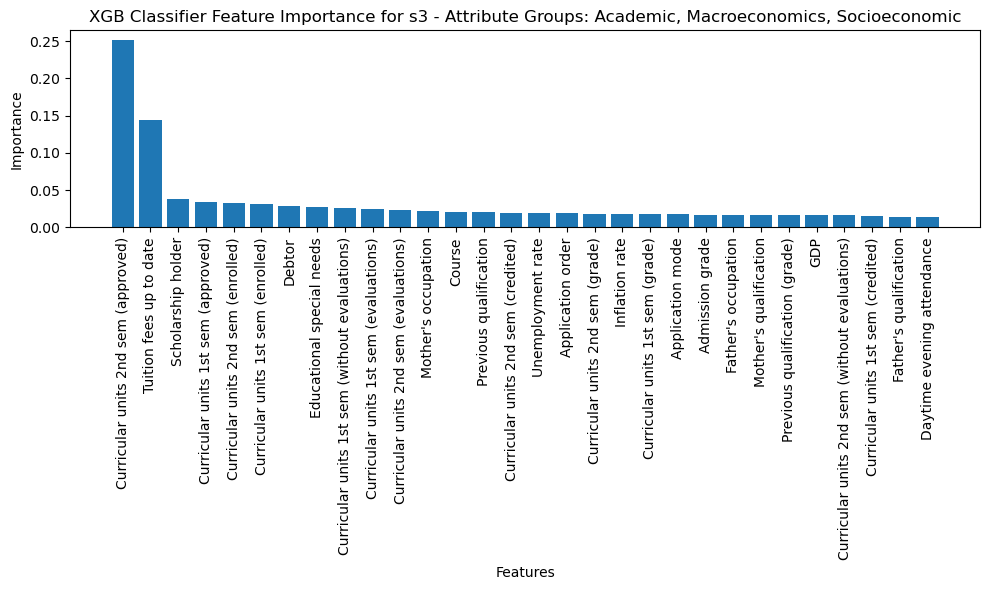

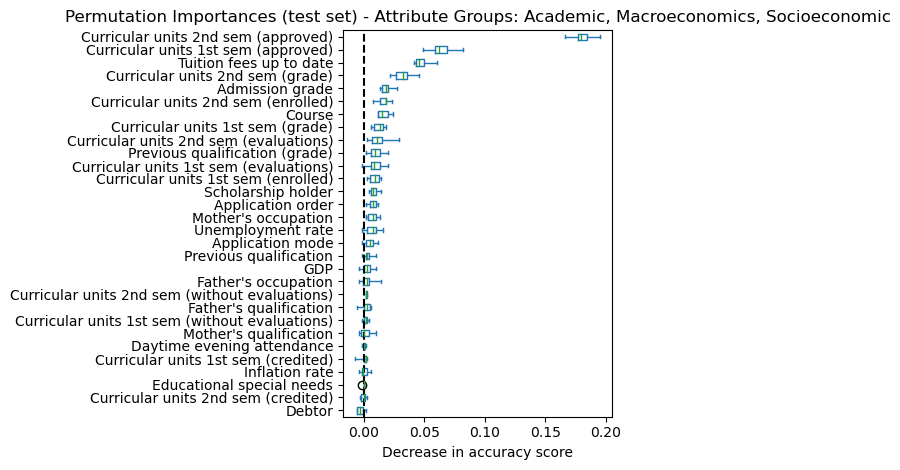

-------------------------------------------------------------

Results for s4:
Attribute Groups: Academic, Macroeconomic, Demographic, Socioeconomic
Accuracy: 0.7830
              precision    recall  f1-score   support

     Dropout       0.82      0.79      0.80       226
    Enrolled       0.54      0.39      0.45       128
    Graduate       0.82      0.93      0.87       342

    accuracy                           0.78       696
   macro avg       0.73      0.70      0.71       696
weighted avg       0.77      0.78      0.77       696



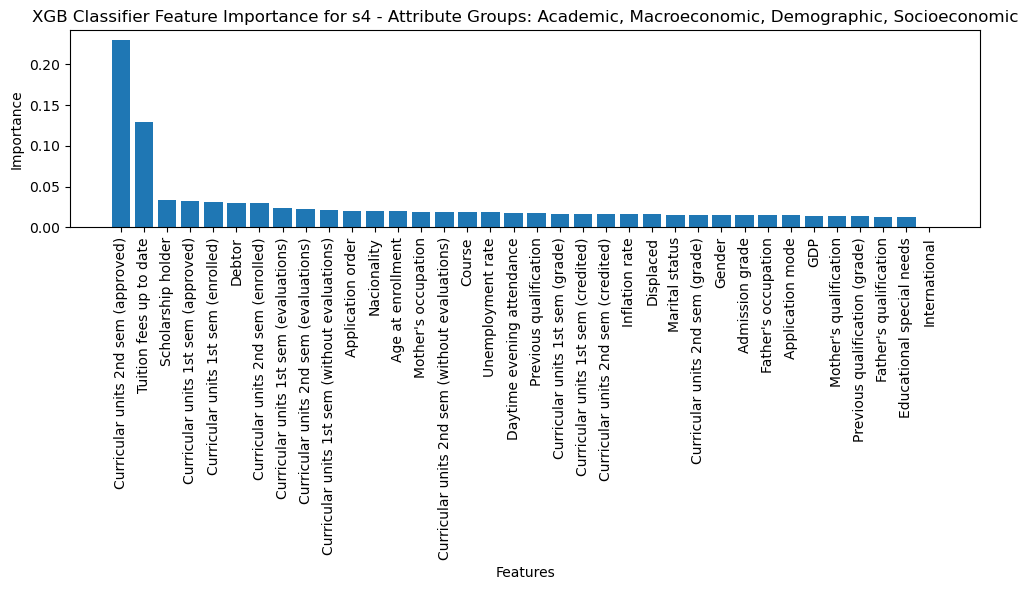

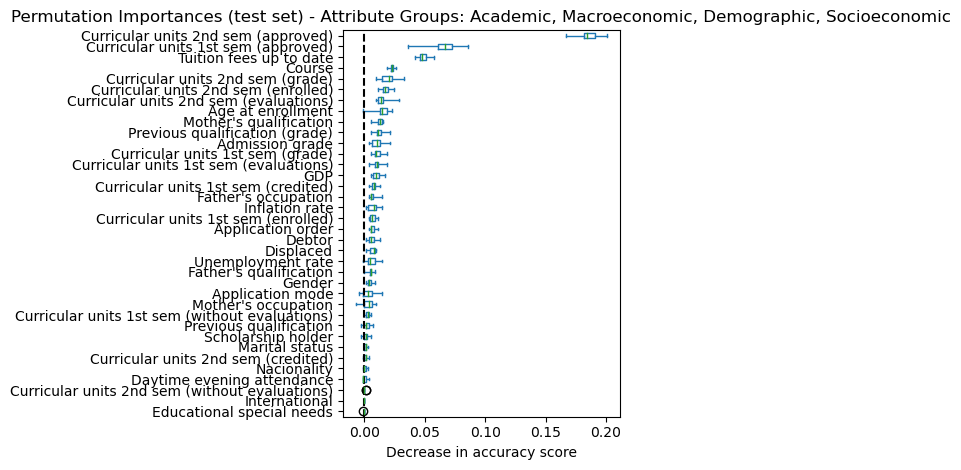

-------------------------------------------------------------

Results for s5:
Attribute Groups: Demographic, Socioeconomic
Accuracy: 0.5819
              precision    recall  f1-score   support

     Dropout       0.59      0.50      0.54       226
    Enrolled       0.24      0.09      0.13       128
    Graduate       0.62      0.82      0.70       342

    accuracy                           0.58       696
   macro avg       0.48      0.47      0.46       696
weighted avg       0.54      0.58      0.55       696



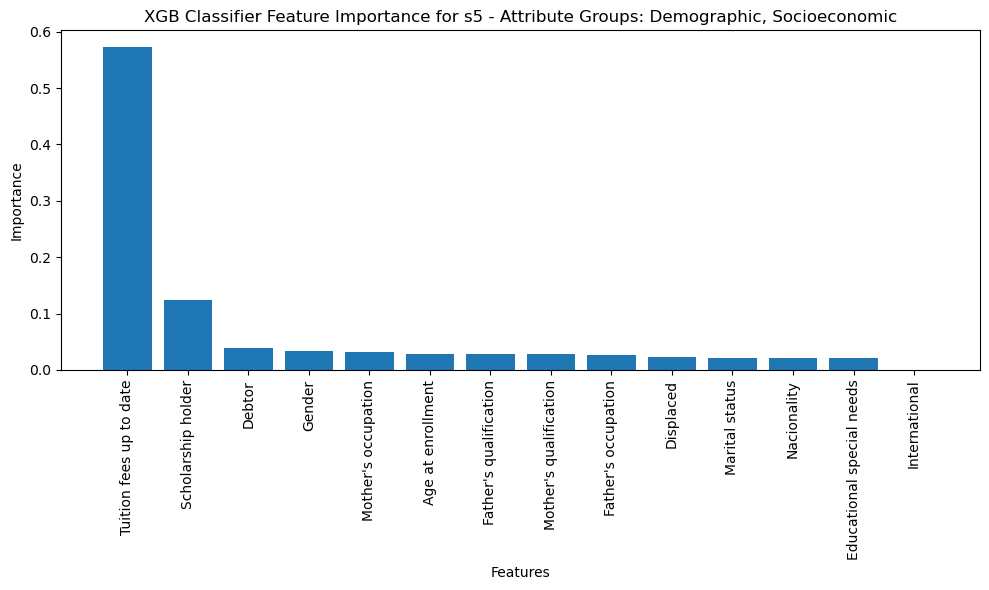

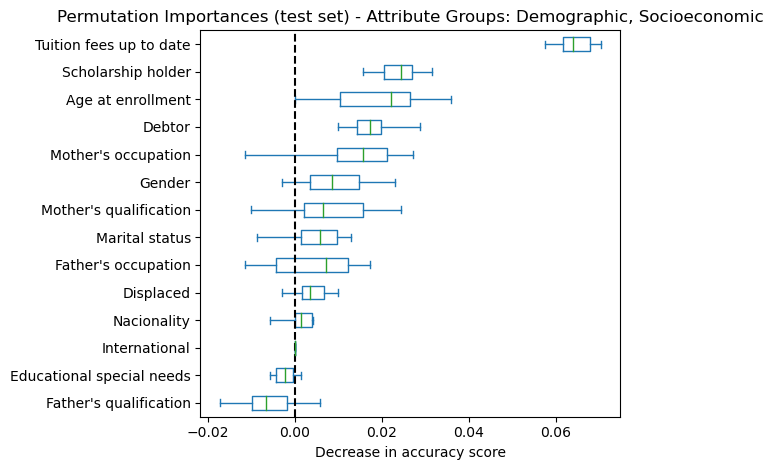

-------------------------------------------------------------



In [23]:


dataframes = [s1, s2, s3, s4, s5]  # 

attribute_groups = [
    ['Academic', 'Macroeconomic'],
    ['Academic', 'Macroeconomics', 'Demographic'],
    ['Academic', 'Macroeconomics', 'Socioeconomic'],
    ['Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['Demographic', 'Socioeconomic']
]


results = []
for i, df in enumerate(dataframes, 1):
    target = df["Target"]
    features = df.drop("Target", axis=1)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=76)
    xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=3, random_state=76)
    xgb_classifier.fit(X_train, y_train)
    predictions = xgb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    target_names = ['Dropout', 'Enrolled', 'Graduate']
    report = classification_report(y_test, predictions, target_names=target_names)
    results.append((accuracy, report))

    print(f"Results for s{i}:")
    print(f"Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)

    # Feature Importance
    feature_importance = xgb_classifier.feature_importances_
    feature_names = list(X_train.columns)

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
    plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'XGB Classifier Feature Importance for s{i} - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.tight_layout()
    plt.show()

    # Permutation Importance
    result = permutation_importance(xgb_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(
        result.importances[sorted_importances_idx].T,
        columns=X_test.columns[sorted_importances_idx],
    )

    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances (test set) - Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()
    plt.show()

    

    print("-------------------------------------------------------------\n")


Bar charts of the two models for the 5 sub datasets.


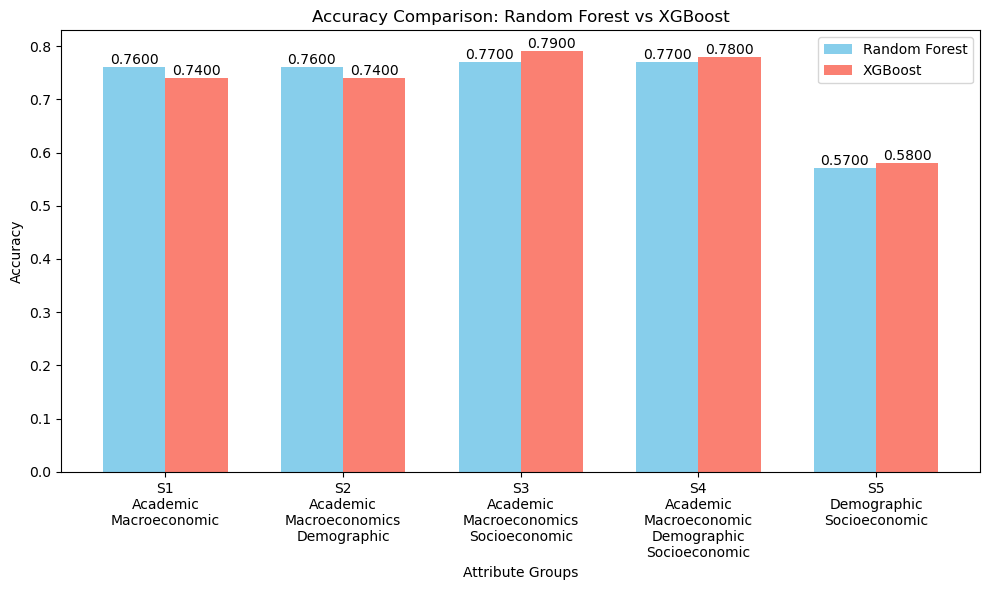

In [24]:


# Accuracy values for Random Forest and XGBoost for each dataset

rf_accuracies = [0.76, 0.76,0.77,0.77,0.57]  
xgb_accuracies = [0.74, 0.74, 0.79,0.78,0.58]  

attribute_groups = [
    ['S1','Academic', 'Macroeconomic'],
    ['S2','Academic', 'Macroeconomics', 'Demographic'],
    ['S3','Academic', 'Macroeconomics', 'Socioeconomic'],
    ['S4','Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['S5','Demographic', 'Socioeconomic']
]

bar_width = 0.35
index = range(len(attribute_groups))

plt.figure(figsize=(10, 6))

# Assigning distinct colors for Random Forest and XGBoost bars
rf_color = 'skyblue'
xgb_color = 'salmon'

bars1 = plt.bar(index, rf_accuracies, bar_width, color=rf_color, label='Random Forest')
bars2 = plt.bar([i + bar_width for i in index], xgb_accuracies, bar_width, color=xgb_color, label='XGBoost')

plt.xlabel('Attribute Groups')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Random Forest vs XGBoost')
plt.xticks([i + bar_width / 2 for i in index], ['\n'.join(groups) for groups in attribute_groups])
plt.legend()

# Displaying actual values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()

plt.show()


Data composition and Model Accuracy

Initial results using these two models (RF and XGB) traind with different subsets:

1. Demographic and Socioeconomic Data Alone (s5)
- Accuracy: 57% (Random Forest), 58% (XGB).
*Note: This subset yields the lowest accuracy.*

2. Academic and Macroeconomic Data (s1)
- Accuracy: 76% (Random Forest), 74% (XGB).
*Observation: Notable improvement compared to s5.*

3. Academic, Macroeconomic, and Demographic Data (s2)
- Accuracy: 76% (Random Forest), 74% (XGB).
*Insight: Similar accuracy to s1, suggesting demographic data has minimal impact.*

4. Academic, Macroeconomic, and Socioeconomic Data (s3)
- Accuracy: 77% (Random Forest), 79% (XGB).
*Key Finding: Socioeconomic data contributes positively to accuracy.*

5. Using All Data
- Accuracy: 77% (Random Forest), 78% (XGB).
*Conclusion: While there's a slight increase, adding more data may not significantly enhance accuracy.*

#### Initial Findings for Research Question

The small difference between the highest and smallest accuracy rate  (1% in RF) and (5% in XGB), ignoring subset s5.

Conclusion: While there's a slight increase, it's important to note that this difference may be within the margin of error and not statistically significant. 

Further statistical analysis may be necessary to determine the significance of these small variations.*
 

#### Remarks and Observations




The dataset contains many categorical features that are numeric encoded.
When they are changed to one hot encoding, the performances of all the models are drastically lower.
For this reasons the results are not included in this report.

However, more attemps will be done (one-hot encoded categorical data,  together with  feature elimantion, may improve model's performance.)




#### Steps to be taken

Model selection will continue, wih different hyperparameters, to choose the final 3 final models.


Feature selection will continue.

K-Fold Cross-Validation:
   - Implement k-fold cross-validation (repeat k times) for robust evaluation.
   - Report average and standard deviation for each fold.

Multiclass Classification:
   - Modify code to handle three classes (Dropout, Enrolled, Graduate).

Results Reporting:
   - Report cross-validation results, including average and standard deviation.
   - Evaluate the selected models on the test set and report results for each class.
   - Clear presentation for the different 5 sub datasets, 3 models and 3 classes. 



In [25]:
end = datetime.now()
 
print("Notebook ended at ", end )


Notebook ended at  2023-11-10 19:29:36.265516
